In [1]:
#import libraries for pre-processing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from dateutil.parser import parse
from datetime import datetime
from scipy.stats import norm

# import all what you need for machine learning
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

# Reading the dataset

In [2]:
df = pd.read_csv('M_House_H.csv')

In [3]:
df.head()

,City,Address,Number_of_rooms,Type,Price_in_dollars,All_Method,REA,Dateofsold,DistanceKM,Postcode,Bathroom,car_place,LandSizeMetres,BuildinSizeMetres,YearBuilt,CouncilArea,Lattitude,Longtitude,GeneralRegion,No_of_properties
0,Collingwood,5/22 Stanley St,2,u,515000.0,S,Peter,18-03-2017,1.6,3066.0,1.0,1.0,816.0,NaN,NaN,Yarra City Council,-37.80200,144.98480,Northern Metropolitan,4553.0
1,Berwick,2 Allan St,3,h,1100000.0,S,Alex,28-10-2017,35.2,3806.0,2.0,2.0,1212.0,NaN,NaN,Casey City Council,-38.03517,145.36564,Eastern Victoria,17093.0
2,Mount Waverley,16 Wadham Pde,5,h,NaN,PI,Harcourts,10-03-2018,14.2,3149.0,5.0,3.0,660.0,158.0,1975.0,Monash City Council,-37.87134,145.12472,Eastern Metropolitan,13366.0
3,Wyndham Vale,6 Fatham Dr,4,h,510000.0,S,hockingstuart,17-03-2018,27.2,3024.0,2.0,2.0,472.0,168.0,2010.0,Wyndham City Council,-37.88102,144.63138,Western Metropolitan,5262.0
4,Essendon,2/31 Leslie Rd,2,u,485000.0,S,Barry,17-06-2017,7.5,3040.0,1.0,1.0,1856.0,NaN,NaN,Moonee Valley City Council,-37.76000,144.91439,Western Metropolitan,9264.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               1275 non-null   object 
 1   Address            1275 non-null   object 
 2   Number_of_rooms    1275 non-null   int64  
 3   Type               1275 non-null   object 
 4   Price_in_dollars   988 non-null    float64
 5   All_Method         1275 non-null   object 
 6   REA                1275 non-null   object 
 7   Dateofsold         1275 non-null   object 
 8   DistanceKM         1274 non-null   float64
 9   Postcode           1274 non-null   float64
 10  Bathroom           985 non-null    float64
 11  car_place          966 non-null    float64
 12  LandSizeMetres     858 non-null    float64
 13  BuildinSizeMetres  496 non-null    float64
 14  YearBuilt          569 non-null    float64
 15  CouncilArea        1274 non-null   object 
 16  Lattitude          989 n

There are 12 numerical datatypes and 8 categorical datatypes

Some columns like Postcode and No of properties are of float datatype which might be problematic. So I'm converting them into object datatype.

In [5]:
df['Postcode'] = df['Postcode'].astype('object')

df['No_of_properties'] = df['No_of_properties'].astype('object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               1275 non-null   object 
 1   Address            1275 non-null   object 
 2   Number_of_rooms    1275 non-null   int64  
 3   Type               1275 non-null   object 
 4   Price_in_dollars   988 non-null    float64
 5   All_Method         1275 non-null   object 
 6   REA                1275 non-null   object 
 7   Dateofsold         1275 non-null   object 
 8   DistanceKM         1274 non-null   float64
 9   Postcode           1274 non-null   object 
 10  Bathroom           985 non-null    float64
 11  car_place          966 non-null    float64
 12  LandSizeMetres     858 non-null    float64
 13  BuildinSizeMetres  496 non-null    float64
 14  YearBuilt          569 non-null    float64
 15  CouncilArea        1274 non-null   object 
 16  Lattitude          989 n

# Five point summary

In [7]:
df.describe()

,Number_of_rooms,Price_in_dollars,DistanceKM,Bathroom,car_place,LandSizeMetres,BuildinSizeMetres,YearBuilt,Lattitude,Longtitude
count,1275.000000,9.880000e+02,1274.000000,985.000000,966.000000,858.000000,496.000000,569.000000,989.000000,989.000000
mean,3.068235,1.061777e+06,11.211617,1.638579,1.732919,529.878788,153.066059,1964.413005,-37.809719,145.000335
std,1.014442,6.447890e+05,6.821451,0.733445,0.988584,711.823001,80.549348,37.565435,0.092380,0.116560
min,1.000000,2.830000e+05,0.000000,1.000000,0.000000,0.000000,0.000000,1860.000000,-38.174360,144.553590
25%,2.000000,6.432500e+05,6.400000,1.000000,1.000000,224.500000,103.000000,1940.000000,-37.860400,144.933480
50%,3.000000,8.805000e+05,10.200000,2.000000,2.000000,521.000000,137.000000,1970.000000,-37.802500,145.005740
75%,4.000000,1.300000e+06,13.975000,2.000000,2.000000,674.750000,188.000000,1998.000000,-37.751700,145.071900
max,10.000000,5.800000e+06,45.900000,6.000000,8.000000,15946.000000,528.000000,2017.000000,-37.536220,145.409480


There are some strange values in this table, like minimum building area is given as 0. So let's check some values before moving on.

In [8]:
#check building area 
df.loc[df.BuildinSizeMetres<1].head()

,City,Address,Number_of_rooms,Type,Price_in_dollars,All_Method,REA,Dateofsold,DistanceKM,Postcode,Bathroom,car_place,LandSizeMetres,BuildinSizeMetres,YearBuilt,CouncilArea,Lattitude,Longtitude,GeneralRegion,No_of_properties
153,Beaumaris,49 Haldane St,4,h,NaN,SP,Buxton,28-10-2017,17.3,3193.0,2.0,2.0,NaN,0.0,2015.0,Bayside City Council,-37.98639,145.03864,Southern Metropolitan,5366.0
738,Wollert,40 Whitebark St,4,h,615000.0,S,HAR,17-03-2018,25.5,3750.0,2.0,2.0,392.0,0.0,2015.0,Whittlesea City Council,-37.61252,145.04288,Northern Metropolitan,2940.0
818,Glen Iris,60 Hortense St,4,h,2237500.0,S,Marshall,21-10-2017,7.3,3146.0,2.0,2.0,650.0,0.0,1985.0,Boroondara City Council,-37.85776,145.07998,Southern Metropolitan,10412.0
1172,Lalor,2 Orchid Ct,5,h,591000.0,S,HAR,18-11-2017,16.3,3075.0,1.0,2.0,636.0,0.0,1980.0,Whittlesea City Council,-37.67010,145.00500,Northern Metropolitan,8279.0


In [9]:
df['BuildinSizeMetres'].loc[df.BuildinSizeMetres<1].count()

4

It seems that 4 houses do not have any building area. It might be an entry error. So I'm deleting these 4 rows.

In [10]:
df = df[~(df['BuildinSizeMetres'] < 1)]

In [11]:
#checking the deletion
df['BuildinSizeMetres'].loc[df.BuildinSizeMetres<1].count()

0

In [12]:
#I'm resetting the index, otherwise I will have some missing rows in my dataframe.
df = df.reset_index()

# Check for missing data

In [13]:
df.isnull().sum()

index                  0
City                   0
Address                0
Number_of_rooms        0
Type                   0
Price_in_dollars     286
All_Method             0
REA                    0
Dateofsold             0
DistanceKM             1
Postcode               1
Bathroom             290
car_place            309
LandSizeMetres       416
BuildinSizeMetres    779
YearBuilt            706
CouncilArea            1
Lattitude            286
Longtitude           286
GeneralRegion          1
No_of_properties       1
dtype: int64

Many of the variables have missing values. Building area is the most affected by them. I would like to explore it's relationship with price and at the same time evaluate whether it is better to impute the missing values with their mean or median. 

In [14]:
#with mean
priceWithMean = df['Price_in_dollars'].fillna(df['Price_in_dollars'].mean())
BAWithMean = df['BuildinSizeMetres'].fillna(df['BuildinSizeMetres'].mean())

#now with the median
priceMedian = df['Price_in_dollars'].fillna(df['Price_in_dollars'].median())
BAMedian = df['BuildinSizeMetres'].fillna(df['BuildinSizeMetres'].median())

In [15]:
missVIDsJoint = df['Price_in_dollars'].isnull() | df['BuildinSizeMetres'].isnull()

In [16]:
# create a dictionary to indicate different colors, missing values will be orange
colorChoiceDict = {True: (1.0, 0.55, 0.0, 1.0), False: (0.11, 0.65, 0.72, 0.1)}

# create a column with color values using list comprehension
colorCol = [colorChoiceDict[val] for val in missVIDsJoint]

Text(0, 0.5, 'Price_in_dollars')

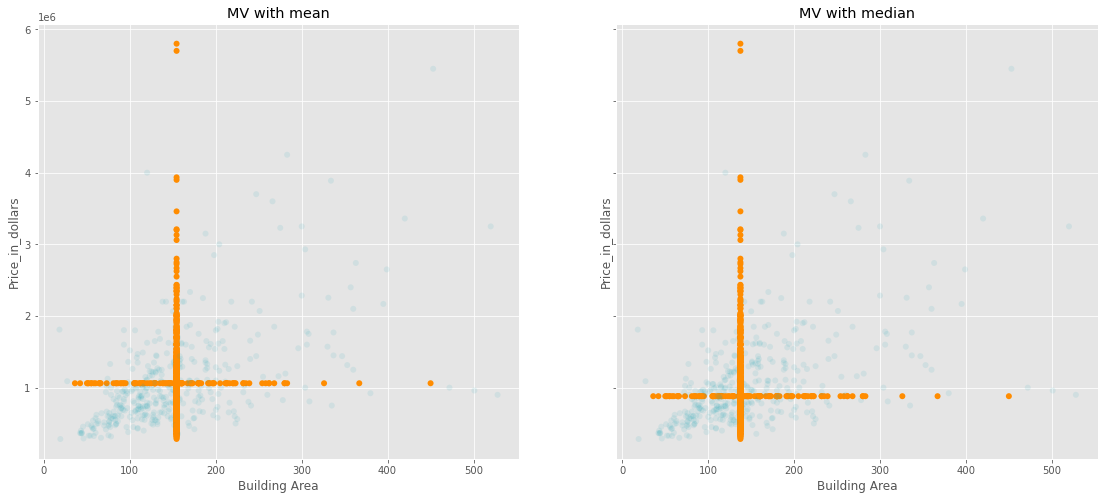

In [17]:
plt.style.use('ggplot')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(19, 8))
ax1.scatter(BAWithMean, priceWithMean, c = colorCol, linewidth=0)
ax1.set_title('MV with mean')
ax1.set_xlabel('Building Area')
ax1.set_ylabel('Price_in_dollars')
ax2.scatter(BAMedian, priceMedian, c = colorCol, linewidth=0)
ax2.set_title('MV with median')
ax2.set_xlabel('Building Area')
ax2.set_ylabel('Price_in_dollars')

In both graphs we can see where the imputed values would be. There is not a striking visual difference between the two graphs. However, after a careful look we can say that Price has a lot of outliers, and the median is less affected by them, as the horizontal line in the graph on the right is lower. 

In [18]:
df['Price_in_dollars'] = df['Price_in_dollars'].fillna(df['Price_in_dollars'].median())
df['LandSizeMetres'] = df['LandSizeMetres'].fillna(df['LandSizeMetres'].median())
#Similarly, fill the only missing value of  all the other numeric values
df['DistanceKM'] = df['DistanceKM'].fillna(df['DistanceKM'].median())
df['BuildinSizeMetres'] = df['BuildinSizeMetres'].fillna(df['BuildinSizeMetres'].median())
df['Lattitude'] = df['Lattitude'].fillna(df['Lattitude'].median())
df['Longtitude'] = df['Longtitude'].fillna(df['Longtitude'].median())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())
df.isnull().sum()

index                  0
City                   0
Address                0
Number_of_rooms        0
Type                   0
Price_in_dollars       0
All_Method             0
REA                    0
Dateofsold             0
DistanceKM             0
Postcode               1
Bathroom             290
car_place            309
LandSizeMetres         0
BuildinSizeMetres      0
YearBuilt              0
CouncilArea            1
Lattitude              0
Longtitude             0
GeneralRegion          1
No_of_properties       1
dtype: int64

For categorical variables, we can use mode.

In [19]:
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].mode()[0])
df['car_place'] = df['car_place'].fillna(df['car_place'].mode()[0])
df['CouncilArea'] = df['CouncilArea'].fillna(df['CouncilArea'].mode()[0])
df['GeneralRegion'] = df['GeneralRegion'].fillna(df['GeneralRegion'].mode()[0])
df['No_of_properties'] = df['No_of_properties'].fillna(df['No_of_properties'].mode()[0])
df['Postcode'] = df['Postcode'].fillna(df['Postcode'].mode()[0])
df.isnull().sum()

index                0
City                 0
Address              0
Number_of_rooms      0
Type                 0
Price_in_dollars     0
All_Method           0
REA                  0
Dateofsold           0
DistanceKM           0
Postcode             0
Bathroom             0
car_place            0
LandSizeMetres       0
BuildinSizeMetres    0
YearBuilt            0
CouncilArea          0
Lattitude            0
Longtitude           0
GeneralRegion        0
No_of_properties     0
dtype: int64

In [20]:
#changing bathroom and car place to integer datatype
df['Bathroom'] = pd.to_numeric(df['Bathroom']).round(0).astype(int)
df['car_place'] = pd.to_numeric(df['car_place']).round(0).astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1271 non-null   int64  
 1   City               1271 non-null   object 
 2   Address            1271 non-null   object 
 3   Number_of_rooms    1271 non-null   int64  
 4   Type               1271 non-null   object 
 5   Price_in_dollars   1271 non-null   float64
 6   All_Method         1271 non-null   object 
 7   REA                1271 non-null   object 
 8   Dateofsold         1271 non-null   object 
 9   DistanceKM         1271 non-null   float64
 10  Postcode           1271 non-null   float64
 11  Bathroom           1271 non-null   int32  
 12  car_place          1271 non-null   int32  
 13  LandSizeMetres     1271 non-null   float64
 14  BuildinSizeMetres  1271 non-null   float64
 15  YearBuilt          1271 non-null   float64
 16  CouncilArea        1271 

# Checking outliers

<AxesSubplot:ylabel='BuildinSizeMetres'>

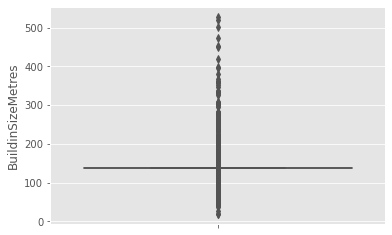

In [22]:
sns.boxplot(data = df, y = 'BuildinSizeMetres')

Let's visualize price and distance outliers. I would keep the threshold to identify outliers quite high in this situation. 

In [24]:
# create additional columns filled with 0 values
df["isOutlierPrice"] = 0 
df["isOutlierDistance"] = 0

# save the mean and standard deviation in variables
meanPrice = df['Price_in_dollars'].mean()
stdDevPrice = df['Price_in_dollars'].std()

meanDistance = df['DistanceKM'].mean()
stdDevDistance = df['DistanceKM'].std()

#mark outliers as 
df['isOutlierPrice'] = np.where(abs(df['Price_in_dollars'] - meanPrice) > 5 * stdDevPrice, 1, 0)
df['isOutlierDistance'] = np.where(abs(df['DistanceKM'] - meanDistance) > 5 * stdDevDistance, 1, 0)

In [25]:
#create a function to compute the percentage of missing values
def percent(nom, denom):
    res= (nom*100)/denom
    print("%.3f%%" % round(res,3))

#percentage of MV for Price
percent(df["isOutlierPrice"].value_counts()[1], df["isOutlierPrice"].value_counts()[0])   

0.633%


In [27]:
#percentage of MV for Landsize
percent(df["isOutlierDistance"].value_counts()[1], df["isOutlierDistance"].value_counts()[0])

0.079%


Less than 1% of values are considered outliers. With the next graph we will visualize this proportion. 

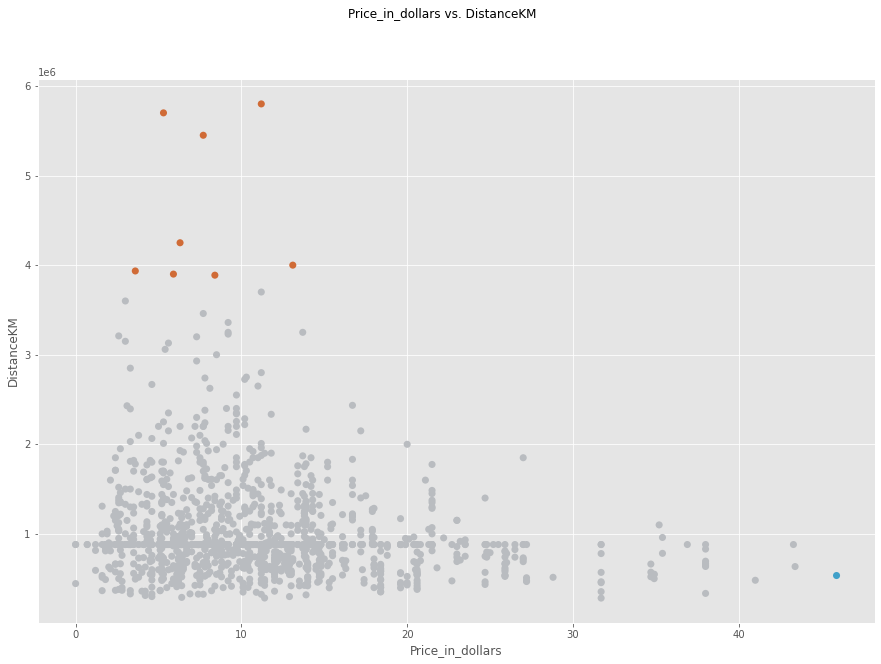

In [28]:
# This part helps us to generate a color array with different colors for the 1D outliers we compute

# first create an empty list
colorColumn = []
# we make use of the HEX color codes to use nicely distinguisable colors
for i in range(len(df)):
    if df["isOutlierPrice"][i]== 1:
        colorColumn.append("#D06B36") # orange color
    elif df["isOutlierDistance"][i] == 1:
        colorColumn.append("#40A0C9") # a blueish color
    else:
        colorColumn.append("#B9BCC0") # gray

plt.figure(figsize=(15,10))
plt.xlabel('Price_in_dollars')
plt.suptitle('Price_in_dollars vs. DistanceKM')
plt.ylabel('DistanceKM')
plt.scatter(df.DistanceKM, df.Price_in_dollars , c = colorColumn, s = 50, linewidth=0)

The above visualization is a simple 1D outlier measure. Each point was an outlier either for price or distance. 

# To find out the co-relation between variables

creating a variable house age and creating two new categories from the variable - Date : year and season.

In [33]:
df['houseAge'] = 2018-df['YearBuilt']

In [34]:
#creating a new column 'data' by restructuring the original Date column with pd.to_datetime
df['data'] = pd.to_datetime(df['Dateofsold'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18-03-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-10-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-03-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-06-2017' in DD/MM/YYYY format. Provide format or specif

In [36]:
# calculate day of year
df['day'] = df['data'].dt.dayofyear
# Create year
df['Year'] = df['data'].dt.year

#to divide by season it's better to use the day of the year instead of the months
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else

date = []
for i in df['day']:
    if i in spring:
        season = 'spring'
    elif i in summer:
        season = 'summer'
    elif i in fall:
        season = 'fall'
    else:
        season = 'winter'
    date.append(season)   

#add the resulting column to the dataframe (after transforming it as a Series)
df['season']= pd.Series(date)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              1271 non-null   int64         
 1   City               1271 non-null   object        
 2   Address            1271 non-null   object        
 3   Number_of_rooms    1271 non-null   int64         
 4   Type               1271 non-null   object        
 5   Price_in_dollars   1271 non-null   float64       
 6   All_Method         1271 non-null   object        
 7   REA                1271 non-null   object        
 8   Dateofsold         1271 non-null   object        
 9   DistanceKM         1271 non-null   float64       
 10  Postcode           1271 non-null   float64       
 11  Bathroom           1271 non-null   int32         
 12  car_place          1271 non-null   int32         
 13  LandSizeMetres     1271 non-null   float64       
 14  BuildinS

# Boxplots and histograms

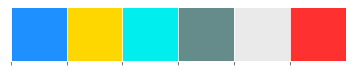

In [39]:
#create my palette
myPal = ["#1E90FF", "#FFD700", "#00EEEE", "#668B8B", "#EAEAEA", "#FF3030"]
sns.set_palette(myPal)
sns.palplot(sns.color_palette())

Let's check the distribution of ordinal and categorical values using box plots

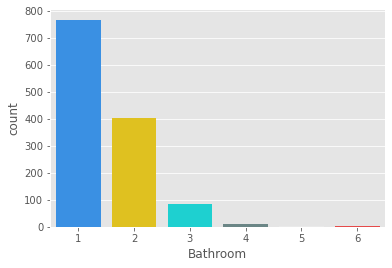

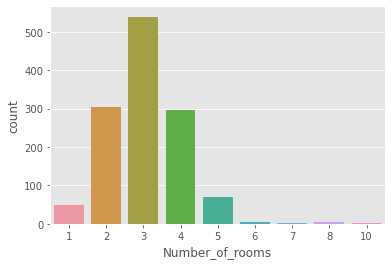

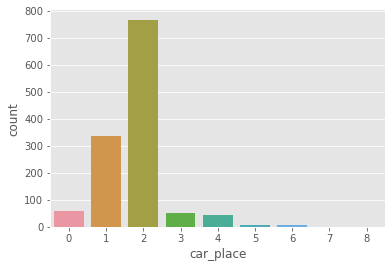

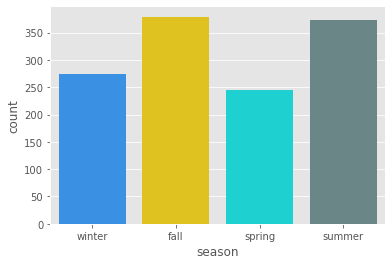

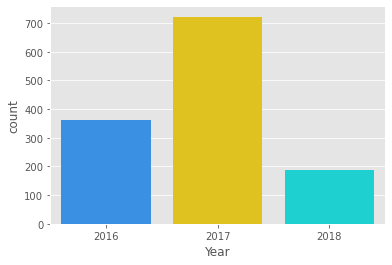

In [40]:
l= ['Bathroom', 'Number_of_rooms', 'car_place', 'season', 'Year']
for i in l:
    plt.figure()
    sns.countplot(x=i, data=df)

**Insights**:

* Most properties were sold on 2017;
* More properties are sold during summer and fall;
* Most houses have space for 2 cars;
* Most houses have between 2 to 4 rooms and 1 or 2 bathrooms;

Now lets take a look at the distribution of continous variables using histograms.

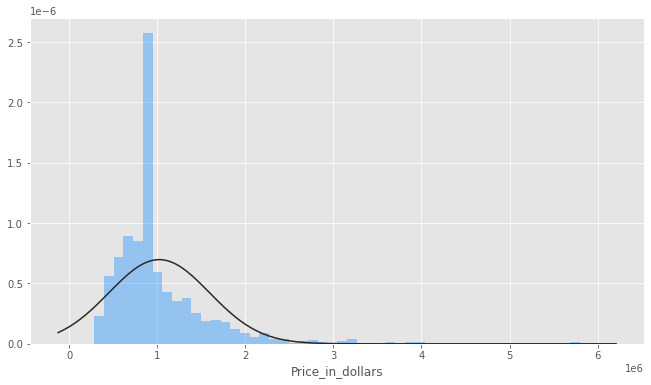

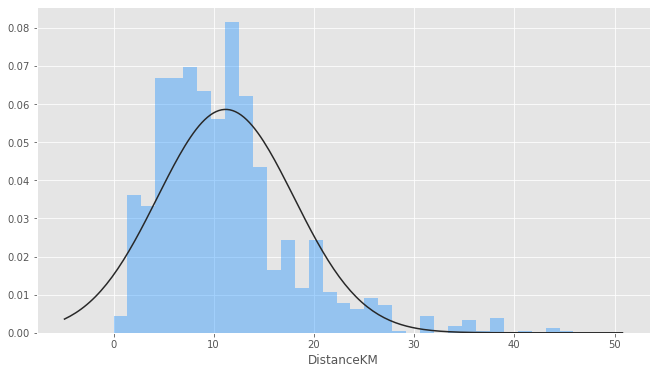

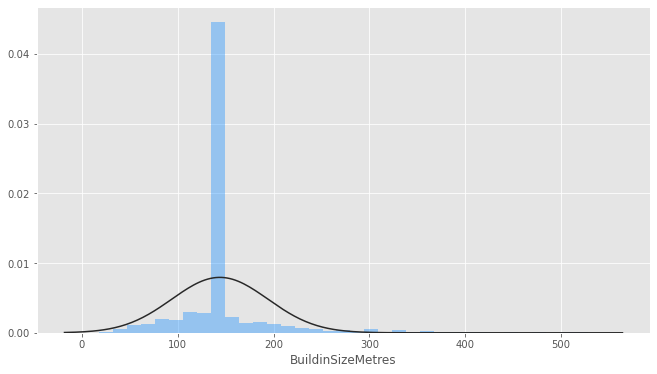

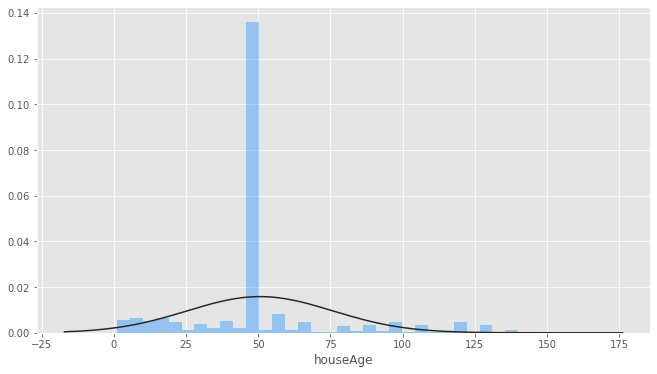

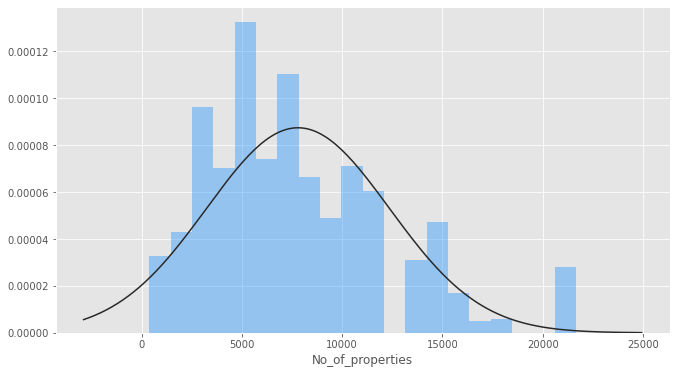

In [41]:
l = [df['Price_in_dollars'], df['DistanceKM'], df['BuildinSizeMetres'], df['houseAge'], df['No_of_properties']]
for i in l:
    plt.figure(figsize=(11,6))
    sns.distplot(i, fit=norm, kde=False)

All the variables here have a different scale, there are many outliers for most of them and none seem really close to normality. 

* Now let us check some variables that may influence our dependent variable price. 

Text(0.5, 1.0, 'Number_of_rooms & Price_in_dollars')

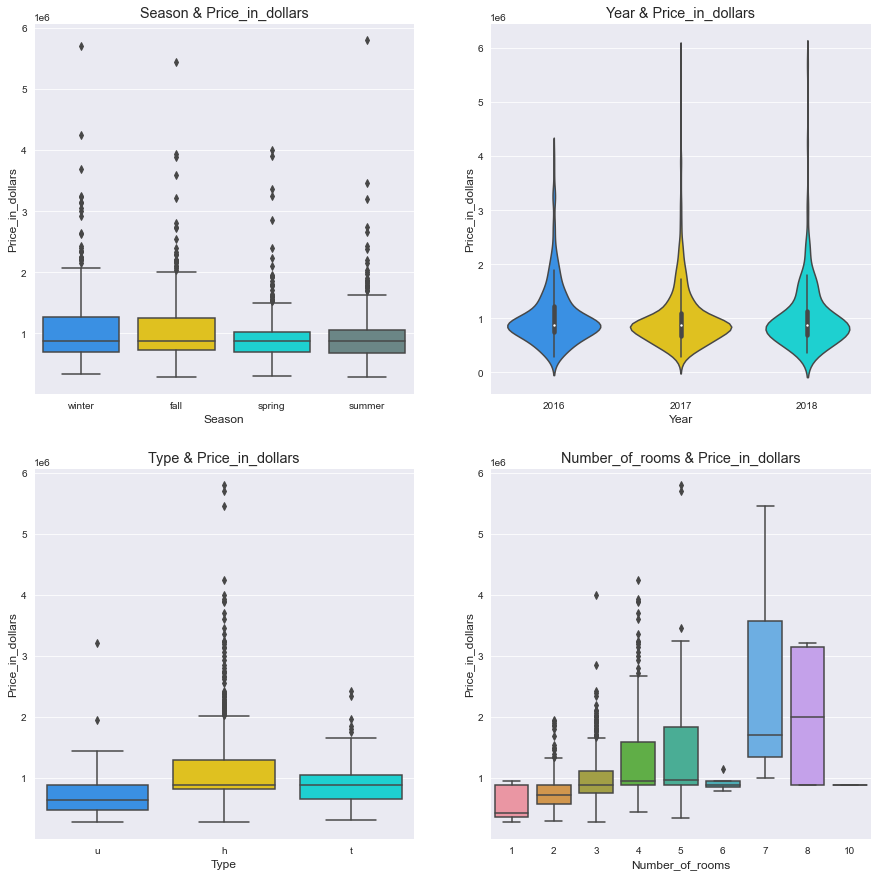

In [42]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = df, x = 'season', y = 'Price_in_dollars', ax = axes[0, 0])
axes[0,0].set_xlabel('Season')
axes[0,0].set_ylabel('Price_in_dollars')
axes[0,0].set_title('Season & Price_in_dollars')

# Plot [0,1]
sns.violinplot(data = df, x = 'Year', y = 'Price_in_dollars', ax = axes[0, 1])
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Price_in_dollars')
axes[0,1].set_title('Year & Price_in_dollars')

# Plot [1,0]
sns.boxplot(x = 'Type', y = 'Price_in_dollars', data = df, ax = axes[1,0])
axes[1,0].set_xlabel('Type')
axes[1,0].set_ylabel('Price_in_dollars')
axes[1,0].set_title('Type & Price_in_dollars')

# Plot [1,1]
sns.boxplot(x = 'Number_of_rooms', y = 'Price_in_dollars', data = df, ax = axes[1,1])
axes[1,1].set_xlabel('Number_of_rooms')
axes[1,1].set_ylabel('Price_in_dollars')
axes[1,1].set_title('Number_of_rooms & Price_in_dollars')

* There is no big diffence in price between houses sold on different seasons of the year. 
* As for years, 2017 was the best year for the market, with apparently more high price outliers. 2018 has less activity, perhaps because data collection did not include the whole year. 
* It seems that there is a slight linear increase in Price for more rooms. 
* Type of house may be an important indicator for price, as is seems that h (cottages) cost more, and have more variability in price. 

##### Time series plots

We have to organize the longitudinal plot with days on the x-axis and price as y-axis. Considering the size of the dataset we expected to have house sales for almost every day.

In [43]:
df.pivot_table('Price_in_dollars', index='data', aggfunc='sum').shape

(72, 1)

([<matplotlib.axis.XTick at 0x25127357340>,
 [Text(0, 0, ''),
  Text(1, 0, 'January'),
  Text(2, 0, 'February'),
  Text(3, 0, 'March'),
  Text(4, 0, 'April'),
  Text(5, 0, 'May'),
  Text(6, 0, 'June'),
  Text(7, 0, 'July'),
  Text(8, 0, 'August'),
  Text(9, 0, 'September'),
  Text(10, 0, 'October'),
  Text(11, 0, 'November'),
  Text(12, 0, 'December')])

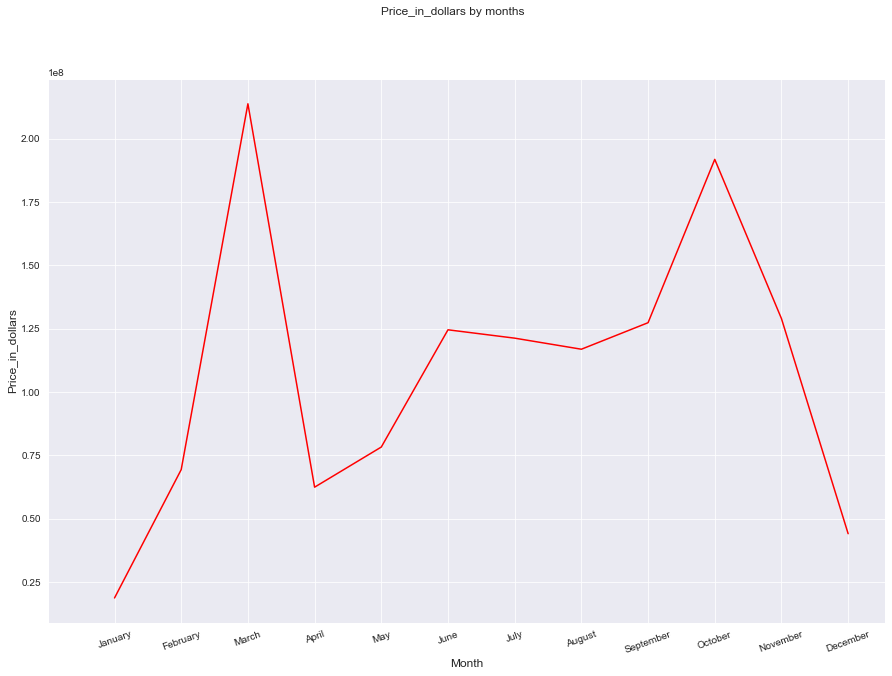

In [45]:
import calendar
# create new column storing the month of each operation
df['month'] = df['data'].dt.month
#use group by (alternative to pivot_table) to have the total value of houses sold per month
by_month= df.groupby('month')['Price_in_dollars'].sum()
#plot figure
plt.figure(figsize=(15,10))
plt.plot(by_month, color="red")
plt.xlabel('Month')
plt.suptitle('Price_in_dollars by months')
plt.ylabel('Price_in_dollars')
plt.xticks(np.arange(13), calendar.month_name[0:13], rotation=20)

Price has reached an increase in the months March and October

[Text(554, 0, '2016-03'),
 Text(555, 0, '2016-04'),
 Text(556, 0, '2016-05'),
 Text(557, 0, '2016-06'),
 Text(558, 0, '2016-07'),
 Text(559, 0, '2016-08'),
 Text(560, 0, '2016-09'),
 Text(561, 0, '2016-10'),
 Text(562, 0, '2016-11'),
 Text(563, 0, '2016-12'),
 Text(564, 0, '2017-01'),
 Text(565, 0, '2017-02'),
 Text(566, 0, '2017-03'),
 Text(567, 0, '2017-04'),
 Text(568, 0, '2017-05'),
 Text(569, 0, '2017-06'),
 Text(570, 0, '2017-07'),
 Text(571, 0, '2017-08'),
 Text(572, 0, '2017-09'),
 Text(573, 0, '2017-10'),
 Text(574, 0, '2017-11'),
 Text(575, 0, '2017-12'),
 Text(577, 0, '2018-02'),
 Text(578, 0, '2018-03'),
 Text(581, 0, '2018-06'),
 Text(585, 0, '2018-10')]

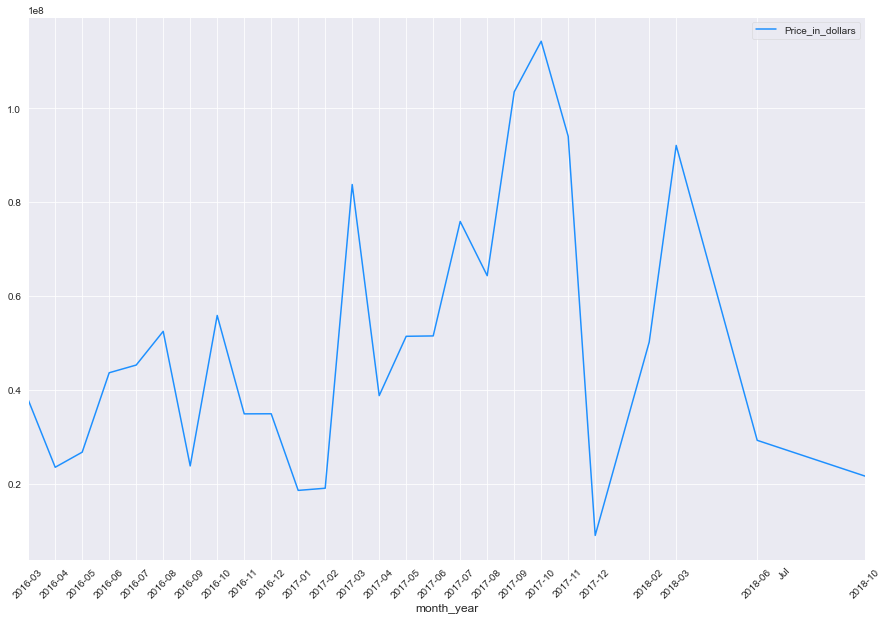

In [46]:
#create index month-year
df['month_year'] = df['data'].dt.to_period('M')
#use groupby to compute the price for each available month, then store the result in a dataframe
by_year_month= pd.Series.to_frame(df.groupby('month_year')['Price_in_dollars'].sum())
#draw graph
fig, ax = plt.subplots(figsize=(15,10))
by_year_month.plot(ax=ax, xticks=by_year_month.index, rot=45)
ax.set_xticklabels(by_year_month.index)

#### Correlation matrix and scatterplots

We have to look at the correlations between our variables and visualize the relationships with scatterplots.

C:\Users\raghu\AppData\Local\Temp\ipykernel_6080\2791892265.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


<AxesSubplot:>

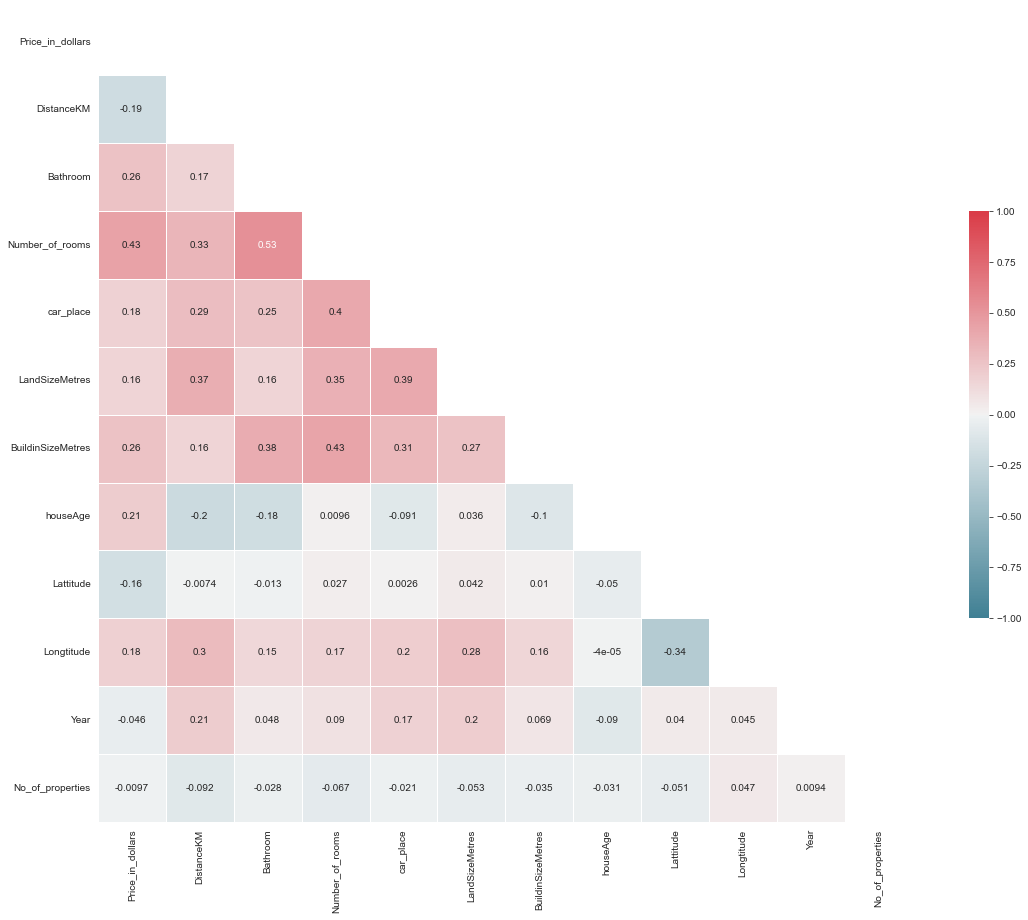

In [47]:
#select only the data we are interested in
attributes = ['Price_in_dollars', 'DistanceKM', 'Bathroom', 'Number_of_rooms', 'car_place', 'LandSizeMetres', 'BuildinSizeMetres', 'houseAge', 'Lattitude', 'Longtitude', 
             'Year', 'No_of_properties']
h = df[attributes]

#whitegrid
sns.set_style('whitegrid')
#compute correlation matrix...
corr_matrix = h.corr(method ='spearman')
#...and show it with a heatmap
#first define the dimension
plt.figure(figsize=(20,15))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, vmax=1, vmin =-1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Number of rooms have the strongest co-relation with price

Building Area, House age also have good positive co-relation with the price

Distance has a negative co-relation with price

<AxesSubplot:xlabel='DistanceKM', ylabel='Price_in_dollars'>

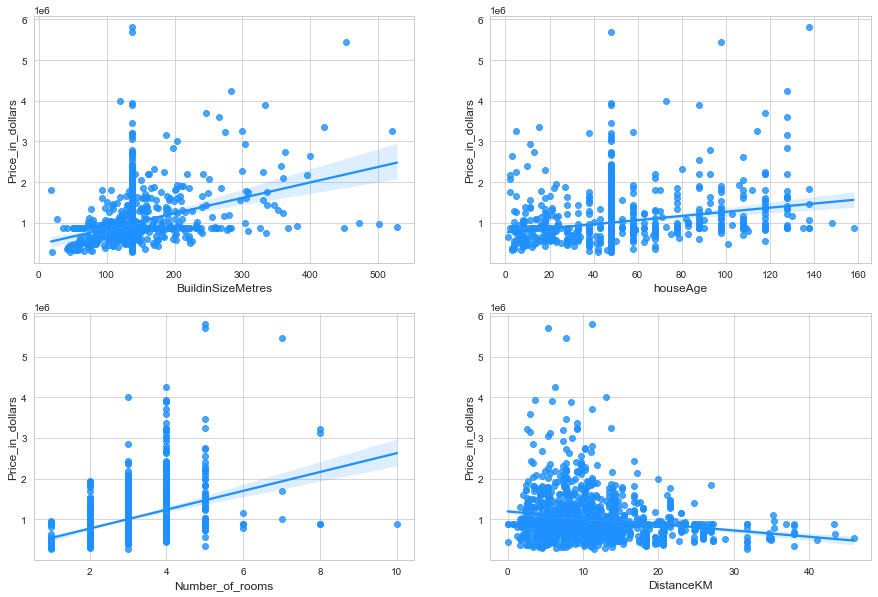

In [48]:
# Scatterplot
f, axes = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.regplot(data= df, x='BuildinSizeMetres', y='Price_in_dollars')
plt.subplot(222)
sns.regplot(data= df, x='houseAge', y='Price_in_dollars')
plt.subplot(223)
sns.regplot(data= df, x='Number_of_rooms', y='Price_in_dollars')
plt.subplot(224)
sns.regplot(data= df, x='DistanceKM', y='Price_in_dollars')

# Using other plots

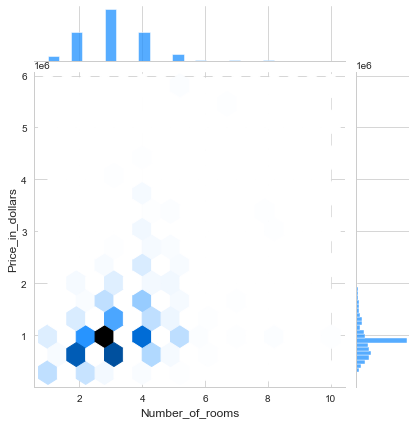

In [50]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Price and distance
    sns.jointplot(y='Price_in_dollars', x='Number_of_rooms', data=df, kind='hex', gridsize=15)

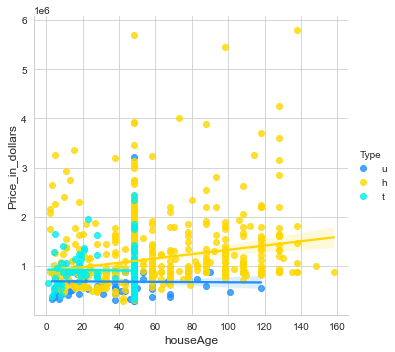

In [51]:
sns.lmplot(data= df, x='houseAge', y= 'Price_in_dollars', hue= 'Type')

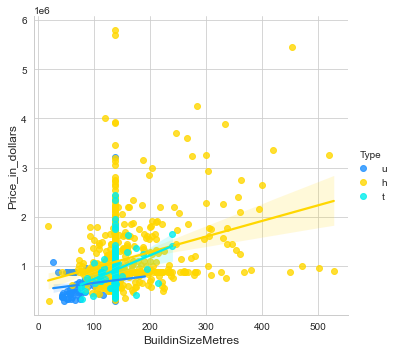

In [52]:
sns.lmplot(data = df, x='BuildinSizeMetres', y= 'Price_in_dollars', hue='Type')

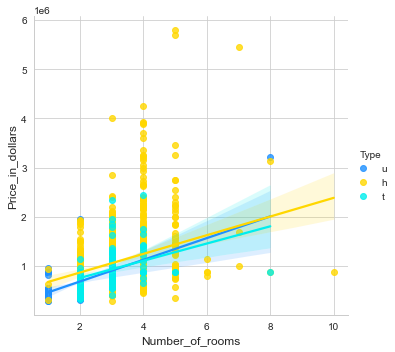

In [53]:
sns.lmplot(data = df, x='Number_of_rooms', y= 'Price_in_dollars', hue='Type')

Type of house and its age determines the price. As the house gets older, the price increases. This is particularly true for Type h, that is cottages and villas.

#####  Geographical Data plotting

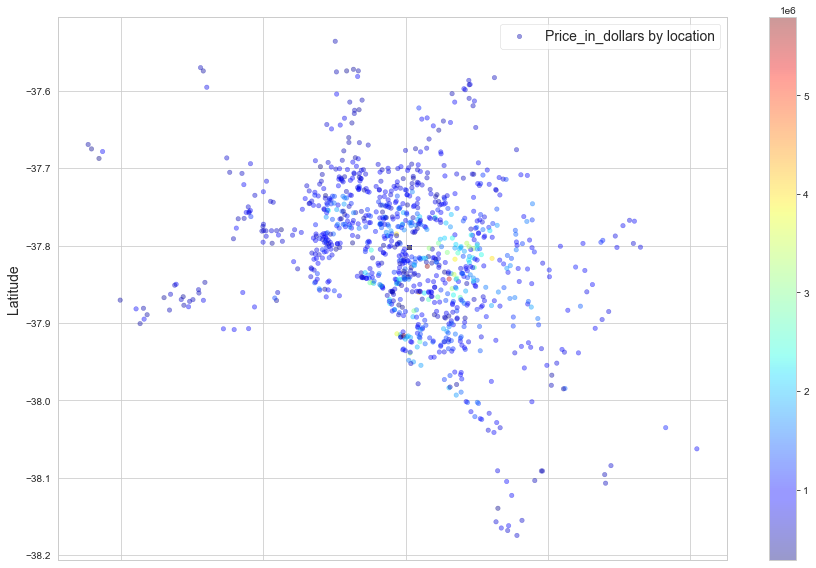

In [54]:
df.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.4,
c = df.Price_in_dollars, cmap=plt.get_cmap("jet"), label= 'Price_in_dollars by location', figsize=(15,10)) 
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)

This plot is quite confusing, because most values are in the low end of the Price range and they turn out as blue. 

In [55]:
df['Price_cut'] = df['Price_in_dollars'].loc[df.Price_in_dollars<3500000]

Text(0.5, 1.0, 'AFTER CUT')

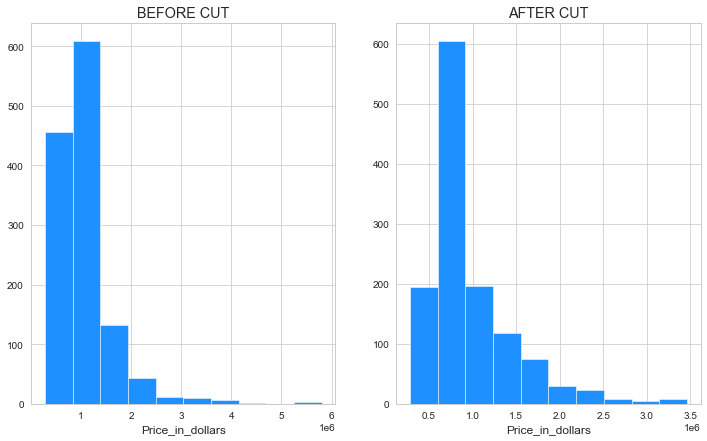

In [56]:
f, axes = plt.subplots(1,2, figsize = (12,7))
# Plot [0,0] full price
df['Price_in_dollars'].hist(ax = axes[0])
axes[0].set_title('BEFORE CUT')
axes[0].set_xlabel('Price_in_dollars')
# Plot [0,1] price cut
df['Price_cut'].hist(ax = axes[1])
axes[1].set_xlabel('Price_in_dollars')
axes[1].set_title('AFTER CUT')

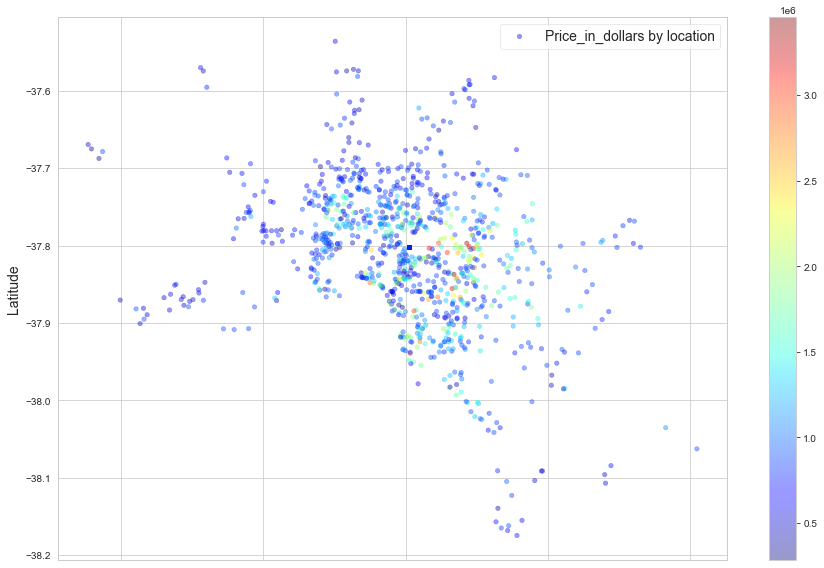

In [57]:
df.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.4,
c=df.Price_cut, cmap=plt.get_cmap("jet"), label= 'Price_in_dollars by location', figsize=(15,10)) 
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)

This graph let us see that most expensive properties are in a central area.

**One-hot encoding** for categorical variables

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              1271 non-null   int64         
 1   City               1271 non-null   object        
 2   Address            1271 non-null   object        
 3   Number_of_rooms    1271 non-null   int64         
 4   Type               1271 non-null   object        
 5   Price_in_dollars   1271 non-null   float64       
 6   All_Method         1271 non-null   object        
 7   REA                1271 non-null   object        
 8   Dateofsold         1271 non-null   object        
 9   DistanceKM         1271 non-null   float64       
 10  Postcode           1271 non-null   float64       
 11  Bathroom           1271 non-null   int32         
 12  car_place          1271 non-null   int32         
 13  LandSizeMetres     1271 non-null   float64       
 14  BuildinS

In [61]:
#dummy variable
hD = pd.get_dummies(df, columns= ['Type', 'GeneralRegion', 'season'])
#drop useless variables
hD = hD.drop(['City', 'Address', 'All_Method', 'REA', 'Dateofsold', 'Postcode', 'CouncilArea', 'isOutlierPrice', 'isOutlierDistance',
            'YearBuilt', 'data', 'day', 'month', 'month_year', 'Price_cut'], axis=1)
#check variables
hD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   index                                     1271 non-null   int64  
 1   Number_of_rooms                           1271 non-null   int64  
 2   Price_in_dollars                          1271 non-null   float64
 3   DistanceKM                                1271 non-null   float64
 4   Bathroom                                  1271 non-null   int32  
 5   car_place                                 1271 non-null   int32  
 6   LandSizeMetres                            1271 non-null   float64
 7   BuildinSizeMetres                         1271 non-null   float64
 8   Lattitude                                 1271 non-null   float64
 9   Longtitude                                1271 non-null   float64
 10  No_of_properties                    

### **Feature Scaling**

In [62]:

X = hD.drop("Price_in_dollars", axis=1)
Y = hD["Price_in_dollars"].copy()

scaler = RobustScaler()
hD= scaler.fit_transform(hD.astype(np.float64))

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .20, random_state= 42)

##### Fitting our three basic models

In [65]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(x_train, y_train)
#fit regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

Testing them on train data in terms of MSE

In [66]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(x_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 445768.15
RMSE of random forest = 168317.45
RMSE of decision tree = 0.00


We can use the Mean absolute percentage error (MAPE) to compute a measure of accuracy that is more immediate to understand.

In [67]:
for i, model in models:
    # Make predictions on train data
    predictions = model.predict(x_train)
    # Performance metrics
    errors = abs(predictions - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_train))
    # Calculate and display accuracy
    accuracy = 100 - mape    
    #print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')

Accuracy of lin_reg= 71.22 %
Accuracy of random forest= 89.57 %
Accuracy of decision tree= 100.00 %


These results are interesting: it seems that decision tree is by far the best model, as its error is the lowest. However, at this point we are only evaluating our models on the train set, so the risk of overfitting for decision trees is quite high. To understand better the performances of the models we can use an alternative strategy: cross-validation. 

### Model comparison

We can cross-validate the three models and compare them. 

In [68]:
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, x_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

In [69]:
results[8]

{'fit_time': array([0.00250983, 0.01350641, 0.        , 0.00505972, 0.01204753,
        0.01500845, 0.        , 0.01837516, 0.01057458, 0.00849462]),
 'score_time': array([0.        , 0.        , 0.01572943, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00471091]),
 'test_score': array([-0.23142253, -1.39575552,  0.16448133,  0.20788881,  0.43487334,
        -0.46261763, -0.7283004 , -0.64679689, -0.35241839, -0.08987806]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [70]:
#THIS IS FOR Linear regression
#if we change sign and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

#THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

#THIS IS FOR DT
DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()

In [71]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean, DT_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std, DT_MAE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, DT_r2_mean],
    'r2_std'      : [LR_r2_std, RF_r2_std, DT_r2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

modelDF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,r2_mean,r2_std
1,Random Forest,462395.044343,6.341904e+10,287255.857326,26577.702663,0.319859,0.155702
0,Linear Regression,461689.306448,6.694478e+10,296729.367563,27359.851073,0.298884,0.171856
2,Decision Trees,623560.992766,1.304335e+11,374019.386042,43546.386767,-0.309995,0.509428


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


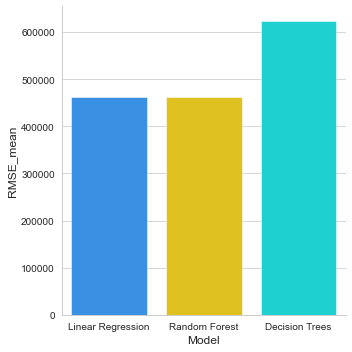

In [72]:
sns.factorplot(x= 'Model', y= 'RMSE_mean', data= modelDF, kind='bar', legend='True')

The best model is random forest, let's proceed with fine tuning our random forest model. 

##### Fine-tuning of Random Forest

### Grid Search

In the grid search we will try different combinations of RF hyperparameters. 

**Most important hyperparameters of Random Forest:**
* n_estimators = n of trees
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement) 


In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [74]:
#lets see how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

453683.6497751118 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
460410.85683368676 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
463964.99397239473 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
457491.55255540425 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
477895.18470880645 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
448997.59991103073 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
461994.1880222214 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
459310.90174220095 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
473392.3178500892 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
449413.38163892174 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
469727.62896168 {'bootstrap': True, 'max_dept

In [75]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(max_depth=50, max_features=5, n_estimators=25, n_jobs=-1)

In [76]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(x_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 89.47 %


In [77]:
#RMSE
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 173319.83


### Randomized search

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [80]:
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [81]:
#now let's how the RMSE changes for each parameter configuration
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

536171.3804165131 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
535130.7770651287 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
444137.113908465 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
463256.2681373877 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
536075.3575388507 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
444113.9326068675 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
443145.51504498353 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
454840.10474607826 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
536513.794052453 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
447750.7323220204 {'n_estimators': 110, 'min_samples_split'

In [82]:
# best random model 
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155, n_jobs=-1)

In [83]:
# best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 23}

In [84]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155, n_jobs=-1)

Now, let's find out about the performance metrics of our new model: MAPE and RMSE. 

In [85]:
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(x_train)
errors = abs(random_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 85.49 %


In [86]:
#this is the RMSE
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 230089.64


In conclusion, the metrics for our best models on the training set after our hyperparameter fine-tuning are the following:

1. **Grid-search**:
    * RMSE: 173319.83
    * accuracy (MAPE): 89.47 %
    
    
2. **Randomized Search**:
    * RMSE: 230089.64
    * accuracy: 85.49 %


**Feature Importance**

In [87]:
# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
D = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(D['importance'])
feature= list(D['feature'])

#see D
print(D)

    importance                                   feature
0     0.112089                                DistanceKM
1     0.108277                           Number_of_rooms
2     0.097009                            LandSizeMetres
3     0.080631                                     index
4     0.074820                                 Lattitude
5     0.064619                         BuildinSizeMetres
6     0.064122                                Longtitude
7     0.062442                                  houseAge
8     0.056308                          No_of_properties
9     0.050391       GeneralRegion_Southern Metropolitan
10    0.047810                                  Bathroom
11    0.036240                                 car_place
12    0.031987                                    Type_u
13    0.030470                                    Type_h
14    0.016519                                      Year
15    0.011341                             season_winter
16    0.009548                 

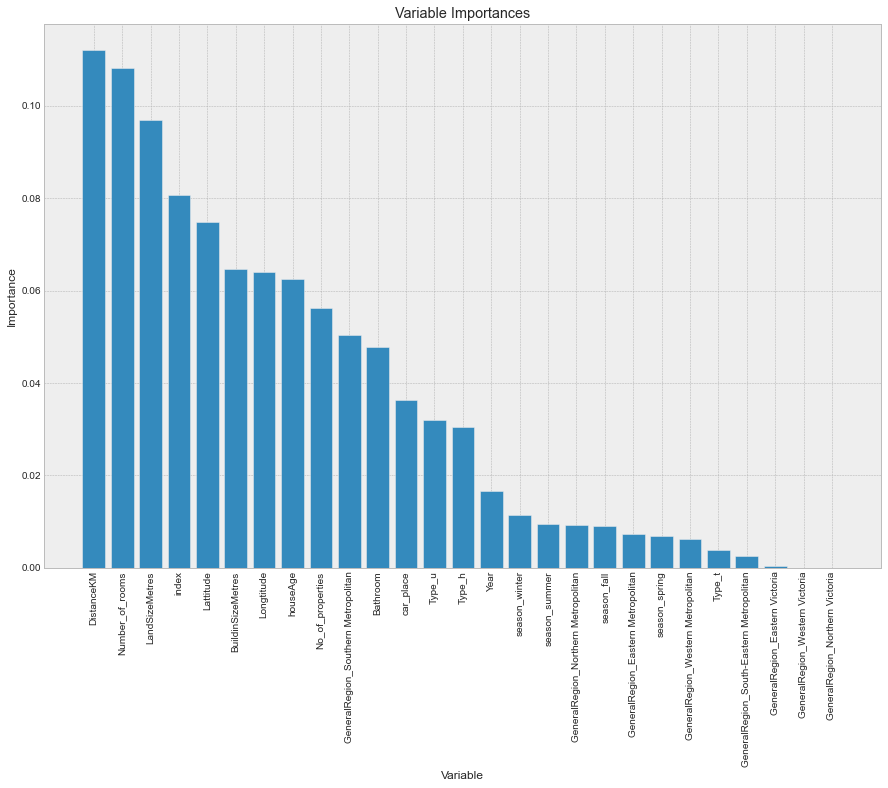

In [88]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Features which are after car_place can be cut off in future. Since they don't have much affect on the price.

#####  Evaluating best model on the test set

In [90]:
final_model = rf_random.best_estimator_
# Predicting test set results
final_pred = final_model.predict(x_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 383922.07


In [91]:
#calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 73.13 %


The performance has droped to 75% 

# Conclusion

* The best feature to reliably predict the price of a house is Distance. After distance that there is a group of 5 features including: number of rooms, Longitude and Latitude, and Southern Metropolitan region. This last dummy attribute is the only one relevant out of the original group of 7 regions. Thus, it seems that the best features are primarily related to the house location, and then to its size (there is also Building size to consider). This is why I chose that title!
* The type of the house seems less important than these two categories, as houseAge and Type_h are respectively 10th and 11th in this ranking. Category Type_t (or townhouse) is the less relevant feature in this cluster. 
* Date features (i.e. Year and the four seasons) are not that important, but in any case the year when the house was sold is slightly more important than the season.